In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
def load_data(file_path):
    # Define the column names
    column_names = ['asin', 'user_id', 'rating', 'timestamp']
    # Read the CSV file specifying that it does not have a header row and set the column names
    data = pd.read_csv(file_path, names=column_names, header=None)
    data['time'] = pd.to_datetime(data['timestamp'], unit='s')
    return data

In [4]:
# Load the dataset
df = load_data(
    '/kaggle/input/amazon-product-reviews-2018/Appliances.csv'
)

In [5]:
print(f'Size of dataset: {len(df):,}')
df.head()

Size of dataset: 602,777


,asin,user_id,rating,timestamp,time
0,1118461304,A3NHUQ33CFH3VM,5.0,1385510400,2013-11-27
1,1118461304,A3SK6VNBQDNBJE,5.0,1383264000,2013-11-01
2,1118461304,A3SOFHUR27FO3K,5.0,1381363200,2013-10-10
3,1118461304,A1HOG1PYCAE157,5.0,1381276800,2013-10-09
4,1118461304,A26JGAM6GZMM4V,5.0,1378512000,2013-09-07


In [6]:
# # Filter out items rated below 3
# df = df[df['rating'] >= 3]
# print(f'Size of dataset: {len(df):,}')
# df.head()

In [7]:
# Filter out rarely rated products
# Define a threshold for minimum number of ratings
min_ratings_threshold = 50

# Calculate the number of ratings for each product
ratings_per_product = df['asin'].value_counts()

# Filter out products that have fewer than the threshold number of ratings
df_ = df[df['asin'].isin(
    ratings_per_product[ratings_per_product >= min_ratings_threshold].index
)].reset_index(drop=True)

In [8]:
print(f'Size of filtered dataset: {len(df_):,}')
df_.head()

Size of filtered dataset: 437,877


,asin,user_id,rating,timestamp,time
0,B00004YWK2,A2UAX5WTHHKBBF,5.0,1197158400,2007-12-09
1,B00004YWK2,A2DHQKNGSYEHLS,3.0,1496707200,2017-06-06
2,B00004YWK2,AZ1F62XGI25RS,4.0,1489449600,2017-03-14
3,B00004YWK2,A2G1T9MVZLOHNG,5.0,1489363200,2017-03-13
4,B00004YWK2,A17109KS0DCTOG,5.0,1489104000,2017-03-10


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

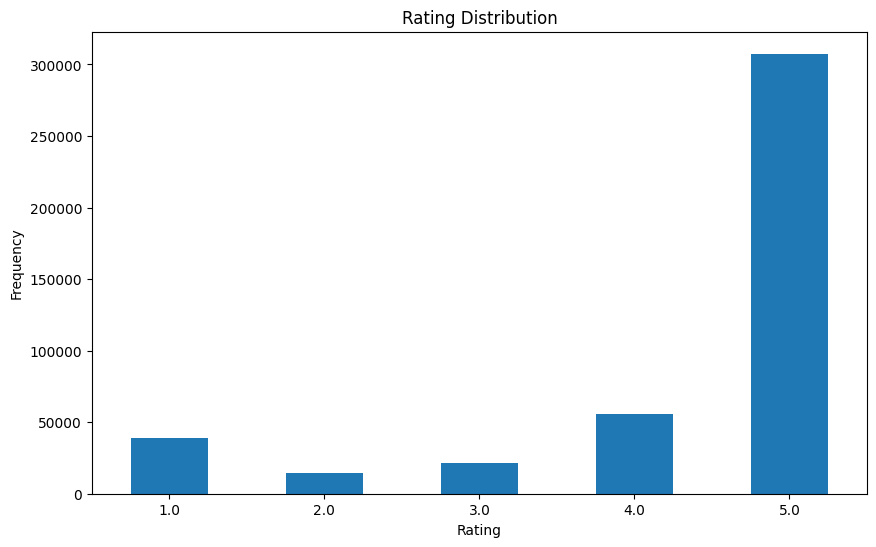

In [10]:
# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
df_['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [11]:
from sklearn.utils import resample

In [12]:
# Separate the majority and minority classes
df_majority = df_[df_['rating'] == 5]
df_minority = df_[df_['rating'] != 5]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [13]:
print(f'Size of upsampled dataset: {len(df_upsampled):,}')
df_upsampled.head()

Size of upsampled dataset: 614,974


,asin,user_id,rating,timestamp,time
0,B00004YWK2,A2UAX5WTHHKBBF,5.0,1197158400,2007-12-09
3,B00004YWK2,A2G1T9MVZLOHNG,5.0,1489363200,2017-03-13
4,B00004YWK2,A17109KS0DCTOG,5.0,1489104000,2017-03-10
6,B00004YWK2,A370HU5Y7P5354,5.0,1485129600,2017-01-23
7,B00004YWK2,ALNRBNT7WMHCQ,5.0,1484524800,2017-01-16


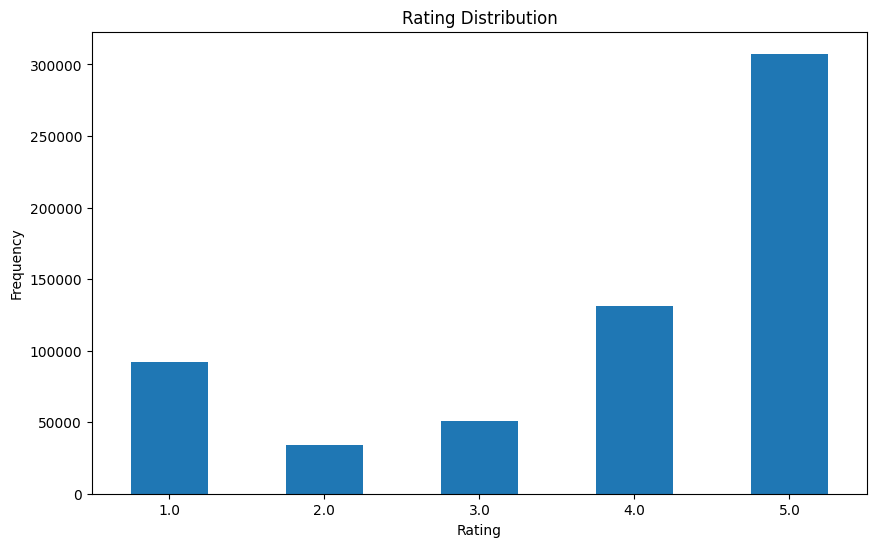

In [14]:
# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
df_upsampled['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [15]:
count_to_drop = len(df_upsampled[df_upsampled.rating == 5]) - len(df_upsampled[df_upsampled.rating == 4]) - 100000

In [16]:
df_dropped = df_upsampled.drop(df_upsampled[df_upsampled.rating == 5].sample(n=count_to_drop, random_state=42).index)
df_dropped = df_dropped.sample(frac=1).reset_index(drop=True)

In [17]:
print(f'Size of dropped dataset: {len(df_dropped):,}')
df_dropped.head()

Size of dropped dataset: 538,562


,asin,user_id,rating,timestamp,time
0,B00GTZMHOW,A0085981OPK4A5A0J73F,3.0,1509408000,2017-10-31
1,B00E8KC36M,AD0AD8KW5XFXS,3.0,1490659200,2017-03-28
2,B00LQDAJ1U,A2JRDIIGYWX309,5.0,1532736000,2018-07-28
3,B000DZFTC6,A2VC3OOMHOU92X,5.0,1505088000,2017-09-11
4,B000AST3AK,A27VIPQ9ZF00L7,4.0,1482278400,2016-12-21


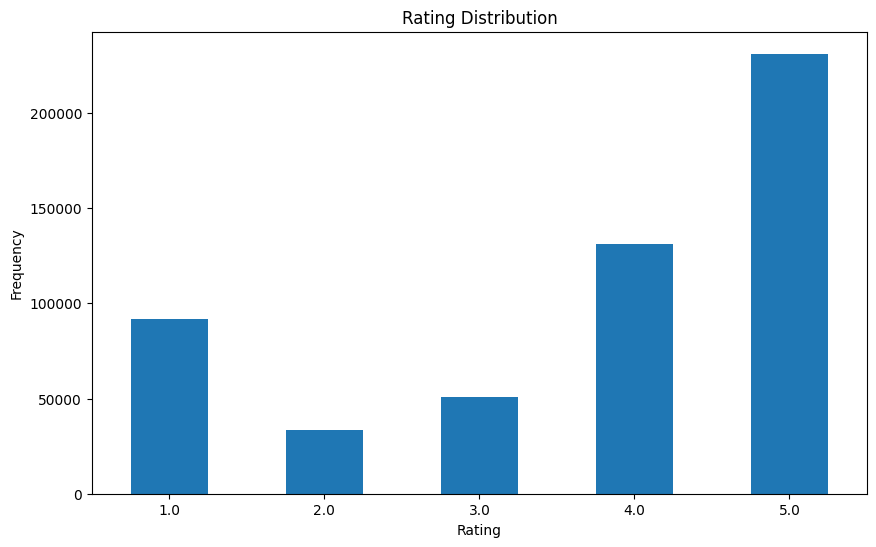

In [18]:
# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
df_dropped['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [19]:
df_ = df_dropped

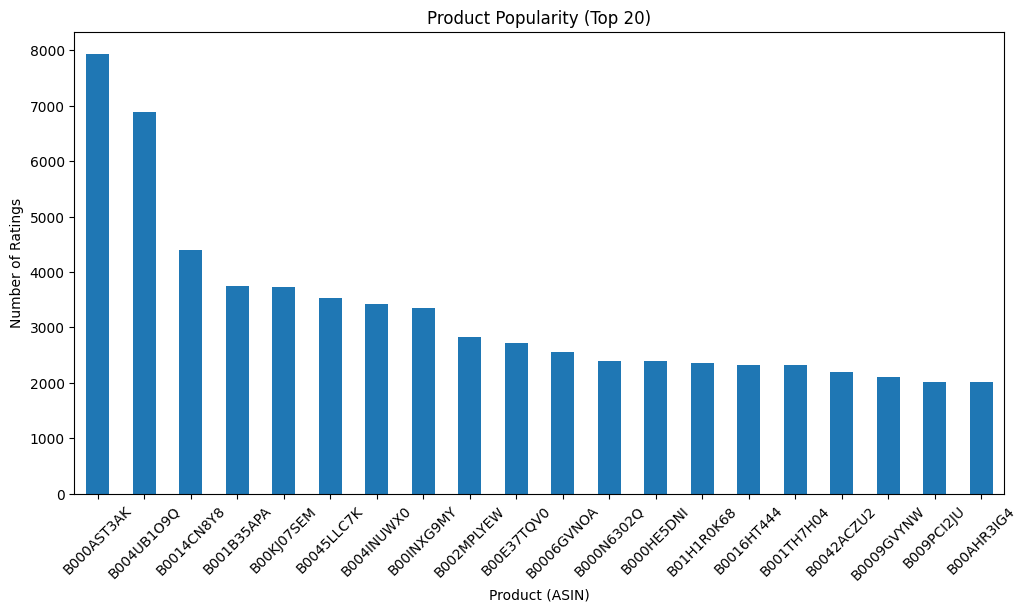

In [20]:
# Calculate product popularity
product_popularity = df_['asin'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
product_popularity[:20].plot(kind='bar')  # Plot only the top 20 products
plt.title('Product Popularity (Top 20)')
plt.xlabel('Product (ASIN)')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

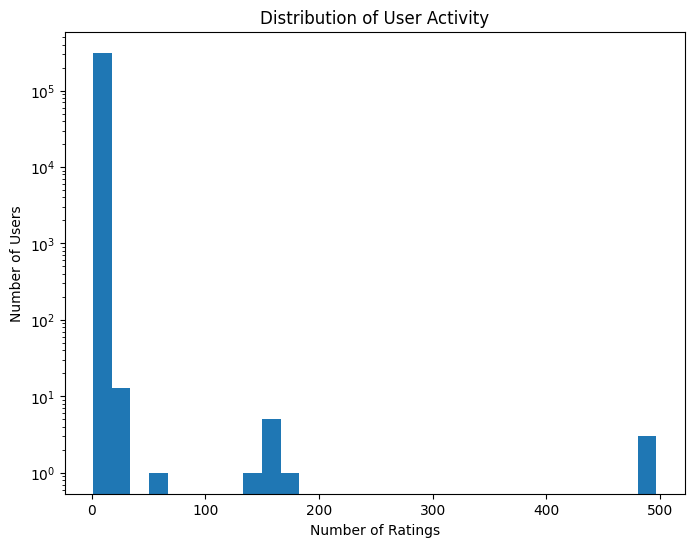

In [21]:
# Calculate user activity
user_activity = df_['user_id'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(user_activity, bins=30, log=True)  # Log scale for better visualization
plt.title('Distribution of User Activity')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

In [22]:
import dask.dataframe as dd

In [23]:
# Create a Dask DataFrame from the original DataFrame
ddf = dd.from_pandas(df_, npartitions=10)

# Remove duplicates based on 'user_id' and 'asin'
ddf = ddf.drop_duplicates(subset=['user_id', 'asin'])

# Add a new column 'interaction' and set its value to 1 for all rows
ddf['interaction'] = 1

# Compute the result and convert it back to a pandas DataFrame
df_copy = ddf.compute()

# Create the user-item matrix using the 'pivot_table' function
user_item_matrix = df_copy.pivot_table(index='user_id', columns='asin', values='interaction', fill_value=0)

In [24]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

In [25]:
# Load data into suitable data type for surprise package
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_[['user_id', 'asin', 'rating']], reader)

In [26]:
# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [27]:
# Set up the SVD algorithm
algorithm = SVD(n_factors=52, n_epochs=50, lr_all=0.040474590755288455, reg_all=0.00529760490356965, random_state=42)

In [28]:
# Train the model on the training set
algorithm.fit(trainset)

# Predict on the test set and calculate RMSE, MSE and MAE
predictions = algorithm.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 0.7844


In [29]:
# Get recommendations for a single user
def get_top_n_recommendations(user_id, n=10):
    # Check which items the user has already rated
    rated_items = df_[df_['user_id'] == user_id]['asin'].tolist()

    # Predict ratings for all items not rated by this user
    all_items = df_['asin'].unique()
    unrated_items = [item for item in all_items if item not in rated_items]

    # Predict ratings for the unrated items
    predictions = [algorithm.predict(user_id, item) for item in unrated_items]

    # Get the top n recommendations
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return [(pred.iid, pred.est) for pred in top_n]

In [30]:
# randomly select a user id
user_id = df_['user_id'].sample().item()
print(f'Selected User ID: {user_id}')

recommendations = get_top_n_recommendations(user_id, 10)
print(f'Top 10 recommended items for user {user_id}:')
for item, rating in recommendations:
    print(f'Item: {item}, Estimated Rating: {rating}')

Selected User ID: A1YDEC4MC0229G
Top 10 recommended items for user A1YDEC4MC0229G:
Item: B01CC7LSEA, Estimated Rating: 5
Item: B0050KKS5C, Estimated Rating: 5
Item: B0014CN8Y8, Estimated Rating: 5
Item: B00DJVIU18, Estimated Rating: 5
Item: B006H7HB7K, Estimated Rating: 5
Item: B00D6MDETI, Estimated Rating: 5
Item: B01CKFSCOS, Estimated Rating: 5
Item: B003YKPAQC, Estimated Rating: 5
Item: B01CC87G86, Estimated Rating: 5
Item: B00DM8J11Q, Estimated Rating: 5


In [31]:
# Extract the top three item IDs from the recommendations
top_three_item_ids = [item[0] for item in recommendations[:3]]

print(f'Top 3 recommended item IDs for user {user_id}:\n{top_three_item_ids}')

Top 3 recommended item IDs for user A1YDEC4MC0229G:
['B01CC7LSEA', 'B0050KKS5C', 'B0014CN8Y8']


In [32]:
# Define the columns that are relevant to your analysis
relevant_columns = ['category', 'description', 'title', 'brand', 'feature','main_cat', 'asin']

def load_meta_data(file_path):
    data = pd.read_json(file_path, lines=True)
    data = data[relevant_columns]
    return data

In [33]:
# Load the whole dataset
metadata = load_meta_data(
    '/kaggle/input/amazon-product-reviews-2018/meta_Appliances.json'
)

In [34]:
print(f'Size of meta dataset: {len(metadata):,}')
metadata.head()

Size of meta dataset: 30,445


,category,description,title,brand,feature,main_cat,asin
0,"[Appliances, Refrigerators, Freezers & Ice Mak...",[],Tupperware Freezer Square Round Container Set ...,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,Appliances,7301113188
1,"[Appliances, Refrigerators, Freezers & Ice Mak...",[2 X Tupperware Pure & Fresh Unique Covered Co...,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,Appliances,7861850250
2,"[Appliances, Parts &amp; Accessories]",[],The Cigar - Moments of Pleasure,The Cigar Book,[],Amazon Home,8792559360
3,"[Appliances, Parts & Accessories]","[Multi purpost descaler, especially suited to ...",Caraselle 2X 50G Appliance Descalene,Caraselle,[],Tools & Home Improvement,9792954481
4,"[Appliances, Parts & Accessories, Range Parts ...",[Full gauge and size beveled-edge; furnished w...,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring,[Returns will not be honored on this closeout ...,Tools & Home Improvement,B00002N5EL


In [35]:
from wordcloud import WordCloud

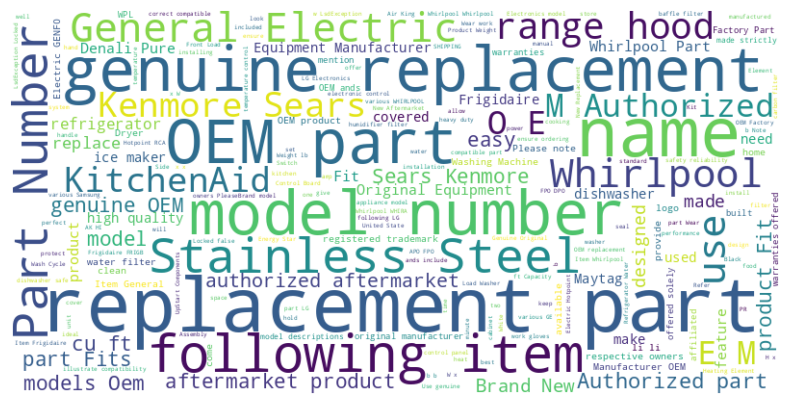

In [36]:
# Combine all product descriptions into a single string
descriptions = [item[0] for item in metadata['description'] if len(item) > 0]
text = ' '.join(descriptions)
text = text.replace('br', '')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
import random

In [38]:
# Define the target ASIN
target_asin = random.choice(top_three_item_ids)
print(f'Target ASIN: {target_asin}')

# Filter the DataFrame to find the product with the specified ASIN
target_item = metadata.loc[metadata['asin'] == target_asin]

# Check if the product was found
if target_item.empty:
    print(f"No product found with ASIN: {target_asin}")
target_item

Target ASIN: B01CC7LSEA


,category,description,title,brand,feature,main_cat,asin
28879,"[Appliances, Parts & Accessories, Refrigerator...","[, <strong>Meet Waterdrop Advanced</strong>, <...",Waterdrop NSF 53&amp;42 Certified Refrigerator...,Waterdrop,[NSF 53 CERTIFIED: Reduces specific health-rel...,Tools & Home Improvement,B01CC7LSEA


In [39]:
# # Randomly select 20,000 items from the DataFrame
# subset_data = metadata.sample(n=20000, random_state=42)  # Use a fixed random state for reproducibility
subset_data = metadata

In [40]:
import re
from bs4 import BeautifulSoup

In [41]:
# Function to flatten and combine text attributes
def flatten_and_combine(row):
    flattened_elements = []
    for col in row:
        if isinstance(col, list):
            # If it's a list, ensure it's not empty
            if col:  # Check if the list is not empty
                # Convert the list to a space-separated string
                flattened_elements.append(' '.join(str(x) for x in col))
        elif isinstance(col, str):
            # If it's a string, ensure it's not empty
            if col.strip():  # Check if it's not an empty string
                flattened_elements.append(col)

    # Join all non-empty elements into a single string
    combined_text = ' '.join(flattened_elements).strip()  # Strip leading/trailing spaces
    return combined_text

In [42]:
# Function to remove HTML tags from a given text with validation
def clean_text(text):
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove file paths and filenames with extensions commonly found in descriptions
    text = re.sub(r'\S+\.(jpg|jpeg|png|gif|bmp|txt|pdf|docx|xlsx)\b', '', text, flags=re.I)

    # Strip HTML content if any
    if '<' in text and '>' in text:
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text(separator=' ', strip=True)

    # Optionally, remove all punctuation (can be customized based on need)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lower case
    text = text.lower()

    return text.strip()

In [43]:
# Define the relevant columns for combining text
important_columns = ['category', 'description', 'title', 'brand', 'feature', 'main_cat']

# Apply the flatten-and-combine function to create the 'combined_text' column
subset_data['combined_text'] = subset_data[important_columns].apply(flatten_and_combine, axis=1)

print(subset_data['combined_text'].head())

0    Appliances Refrigerators, Freezers & Ice Maker...
1    Appliances Refrigerators, Freezers & Ice Maker...
2    Appliances Parts &amp; Accessories The Cigar -...
3    Appliances Parts & Accessories Multi purpost d...
4    Appliances Parts & Accessories Range Parts & A...
Name: combined_text, dtype: object


In [44]:
# Apply the cleaning function to the 'combined_text' column
subset_data['combined_text'] = subset_data['combined_text'].apply(clean_text)

# Validate the cleaned text
print("Cleaned combined text:")
print(subset_data['combined_text'].head())

Cleaned combined text:
0    appliances refrigerators freezers  ice makers ...
1    appliances refrigerators freezers  ice makers ...
2    appliances parts amp accessories the cigar  mo...
3    appliances parts  accessories multi purpost de...
4    appliances parts  accessories range parts  acc...
Name: combined_text, dtype: object


In [45]:
# Specify the filename
text_file_path = 'combined_text.txt'        # all items
# Open the file in write mode and save the content
with open(text_file_path, 'w', encoding='utf-8') as f:
    # Write each row on a new line
    for text in subset_data['combined_text']:
        f.write(text + '\n')

print("Content saved to", text_file_path)
print(subset_data.columns)

Content saved to combined_text.txt
Index(['category', 'description', 'title', 'brand', 'feature', 'main_cat',
       'asin', 'combined_text'],
      dtype='object')


In [46]:
def clean_text(text):
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Strip HTML content if any
    if '<' in text and '>' in text:
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text(separator=' ', strip=True)

    # Convert to lower case and strip extra spaces
    return text.lower().strip()

In [47]:
def flatten_and_combine_target(row):
    flattened_elements = []
    for col in row:
        if isinstance(col, list):
            if col:  # Ensure it's not empty
                combined_list_text = ' '.join(str(x) for x in col)
                cleaned_text = clean_text(combined_list_text)  # Clean each combined list text
                flattened_elements.append(cleaned_text)
        elif isinstance(col, str):
            if col.strip():  # Ensure it's not empty
                cleaned_text = clean_text(col)  # Clean each text element
                flattened_elements.append(cleaned_text)

    # Join all non-empty and cleaned elements into a single string
    combined_text = ' '.join(flattened_elements).strip()  # Remove extra spaces
    return combined_text

In [48]:
# Define the relevant columns for combining text
important_columns = ['category', 'description', 'title', 'brand', 'feature', 'main_cat']

# Apply the flatten-and-combine function to the target item
cleaned_target_text = flatten_and_combine_target(target_item[important_columns].iloc[0])


print("Cleaned text for the target item:")
print(cleaned_target_text)

Cleaned text for the target item:
appliances parts & accessories refrigerator parts & accessories water filters meet waterdrop advanced n sf 53 certified for health effects y our needs, our priority water quality varies greatly from one region to another. also, individuals attempting to address specific health issues may require different filtration solutions. in such cases, one ordinary filter may not satisfy your special and demanding needs. therefore, we continuously research and develop innovative technologies to produce filters with different effects, and then launch three series accordingly: waterdrop standard , waterdrop advanced and waterdrop plus , to best suit your filtration needs. we try harder and fight to give you cleaner and healthier water in the most effective way. we believe drinking clean water is the basic human rights, so we are committed to delivering clean water to everyone. together with the water project, we are investing in better sanitation in schools in afri

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
# Vectorizer to convert text into numerical representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
# Transform the combined text of the subset
tfidf_subset = tfidf_vectorizer.fit_transform(subset_data['combined_text'])
# Transform the combined text of the target item
tfidf_target = tfidf_vectorizer.transform([cleaned_target_text])

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
# Compute cosine similarity between the target item and the subset
cosine_sim = cosine_similarity(tfidf_target, tfidf_subset)

# Get the similarity scores
similarity_scores = list(enumerate(cosine_sim[0]))  # Extract the first row of similarity scores

# Sort by similarity score in descending order
sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Get the top 5000 most similar items
top_similar_items = [subset_data['asin'].iloc[i[0]] for i in sorted_scores[:5000]]

print("Top 10 most similar items to the target item:")
for item in top_similar_items[:10]:
    print("ASIN:", item)

Top 10 most similar items to the target item:
ASIN: B01CC7LSEA
ASIN: B01CC7LSF4
ASIN: B01CC7LSE0
ASIN: B01CC7N5PU
ASIN: B01CC7IVF4
ASIN: B01CC7N5PA
ASIN: B01CA3KOA0
ASIN: B01CA34OU6
ASIN: B01CA26LYE
ASIN: B01CC83YAK


In [53]:
# List of top similar ASINs
top_similar_asins = top_similar_items

# Step 1: Find indices for each ASIN
top_texts = []
asin_found = []  # This will store the ASINs for which text is successfully retrieved
for asin in top_similar_asins:
    if asin in subset_data['asin'].values:
        text = subset_data.loc[subset_data['asin'] == asin, 'combined_text'].values[0]
        top_texts.append(text)
        asin_found.append(asin)
    else:
        print(f"ASIN not found: {asin}")

In [54]:
Dive_measure_text = [cleaned_target_text] + top_texts[:2000]

# Initialize the vectorizer and fit on all texts to create a consistent vocabulary
tfidf_vectorizer = TfidfVectorizer()
tfidf_all_texts = tfidf_vectorizer.fit_transform(Dive_measure_text)

# Separate the target's TF-IDF vector and similar items' TF-IDF vectors
tfidf_target = tfidf_all_texts[0]  # Target text is the first one
tfidf_similars = tfidf_all_texts[1:]  # Rest are the similar items

In [55]:
from scipy.spatial.distance import euclidean

In [56]:
array_target = tfidf_target.toarray()  # Convert to dense format if feasible
array_similars = tfidf_similars.toarray()

# Function to calculate Euclidean distances
def calculate_euclidean_distances(target, similars):
    distances = []
    # Ensure the target is a 1-D array
    target = target.flatten()  # This makes sure the target is 1-D if it isn't already
    for similar in similars:
        # Ensure each similar item vector is also 1-D
        similar = similar.flatten()  # Flatten the similar array to be 1-D
        dist = euclidean(target, similar)
        distances.append(dist)
    return distances

In [57]:
# Assuming that array_target and array_similars have been defined correctly
# Calculate Euclidean distances from the target to each similar item
# Here we assume array_target is already 2D but only contains one row (one target vector)
euclidean_distances = calculate_euclidean_distances(array_target[0], array_similars)

In [58]:
# Pair each ASIN with its Jaccard distance and sort by distance
asin_distances = list(zip(asin_found, euclidean_distances))
asin_distances_sorted = sorted(asin_distances, key=lambda x: x[1], reverse=True)

# Print the top 10 most diverse ASIN with its corresponding Jaccard distance
for asin, distance in asin_distances_sorted[:10]:
    print(f"ASIN: {asin}, euclidean Distance: {distance}")

ASIN: B000UVYJHE, euclidean Distance: 1.4010019935917075
ASIN: B014W61VNM, euclidean Distance: 1.3986397755661921
ASIN: B00FYWKT28, euclidean Distance: 1.3984273458463816
ASIN: B015WVQWNK, euclidean Distance: 1.3980481306699835
ASIN: B004E6UV7S, euclidean Distance: 1.3980174791535016
ASIN: B00M4GFHY2, euclidean Distance: 1.3978939542667297
ASIN: B00WA1A14M, euclidean Distance: 1.3977589921831517
ASIN: B0074CJFVC, euclidean Distance: 1.3976911924624293
ASIN: B00EXRIMRO, euclidean Distance: 1.3974072447944506
ASIN: B002HXZFB2, euclidean Distance: 1.397358296467105


In [59]:
import numpy as np

In [60]:
def calculate_miuf(bundle, user_item_matrix):   
    # Initialize a list to store the inverse user frequencies of the items in the bundle
    iuf_values = []
    
    # Calculate the total number of users
    total_users = user_item_matrix.shape[0]

    # For each item in the bundle
    for asin in bundle:
        # Calculate the user frequency of the item (i.e., the number of users who have interacted with the item)
        user_frequency = user_item_matrix.get(asin, np.array([1])).sum()

        # Calculate the inverse user frequency of the item
        iuf = -np.log2(user_frequency / total_users)
        
        # Add the inverse user frequency to the list
        iuf_values.append(iuf)

    # Calculate the MIUF of the bundle (i.e., the mean of the inverse user frequencies)
    miuf = np.mean(iuf_values)
    
    # Return the MIUF of bundle
    return iuf_values, miuf

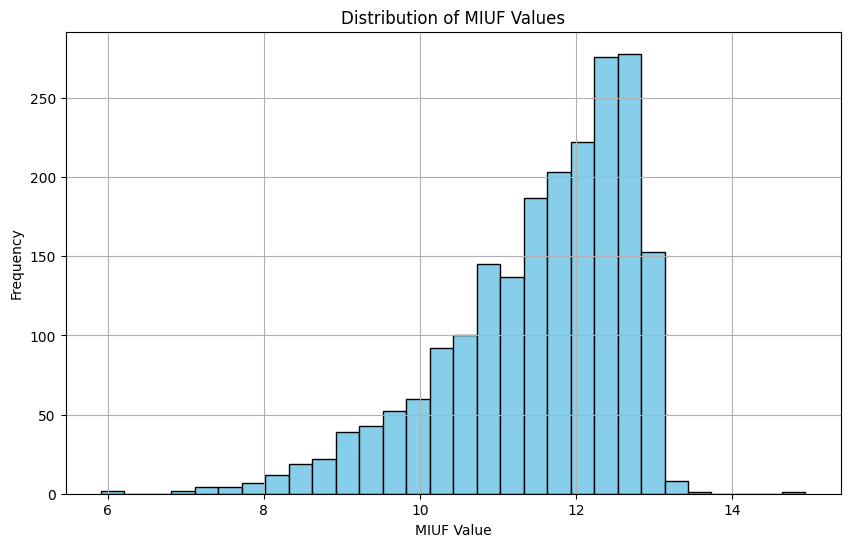

In [61]:
def calculate_iuf(user_frequency, total_users):
    # Calculate the Inverse User Frequency (IUF) for a single item.
    
    # Prevent division by zero by ensuring user_frequency is at least 1
    user_frequency = max(user_frequency, 1)
    
    # Calculate the inverse user frequency
    iuf = -np.log2(user_frequency / total_users)
    return iuf

def calculate_miuf_for_all_items(user_item_matrix):
    """
    Calculate the MIUF for all items in the dataset.
    
    Parameters:
    - user_item_matrix: a dictionary where keys are item ASINs and values are 
      arrays representing user interactions (1 if user interacted, 0 if not).
      
    Returns:
    - miuf_values: a dictionary where keys are item ASINs and values are the MIUF values.
    """
    
    # Initialize a dictionary to store the MIUF for each item
    miuf_values = {}
    
    # Calculate the total number of users
    total_users = user_item_matrix.shape[0]
    
    # Iterate over each item in the dataset
    for asin in user_item_matrix.columns:
        # Calculate the user frequency of the item
        user_frequency = user_item_matrix[asin].sum()
        
        # Calculate the inverse user frequency (IUF) of the item
        iuf = calculate_iuf(user_frequency, total_users)
        
        # Store the IUF value for this item
        miuf_values[asin] = iuf
        
    return miuf_values

# Example usage:
# Assuming user_item_matrix is a DataFrame where each row is a user and each column is an item (ASIN).
# For example, user_item_matrix.loc[user_id, asin] == 1 if the user interacted with the item, else 0.
miuf_values = calculate_miuf_for_all_items(user_item_matrix)

# Now miuf_values is a dictionary containing the MIUF for each item in the dataset

# Assuming miuf_values is a dictionary where keys are ASINs and values are MIUF scores
miuf_list = list(miuf_values.values())

# Plot the histogram of MIUF values
plt.figure(figsize=(10, 6))
plt.hist(miuf_list, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of MIUF Values')
plt.xlabel('MIUF Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [62]:
# Calculate specific percentiles
percentile_90 = np.percentile(miuf_list, 90)
percentile_75 = np.percentile(miuf_list, 75)

print(f"90th Percentile MIUF: {percentile_90}")
print(f"75th Percentile MIUF: {percentile_75}")

90th Percentile MIUF: 12.797486520310073
75th Percentile MIUF: 12.449563216889766


In [63]:
def get_user_previous_interactions(user_id):
    # Filter the DataFrame to include only interactions from the specified user
    user_interactions = df_copy[df_copy['user_id'] == user_id]
    
    # Sort the interactions by timestamp or time, depending on what's available
    if 'timestamp' in user_interactions.columns:
        user_interactions = user_interactions.sort_values(by='timestamp', ascending=False)
    elif 'time' in user_interactions.columns:
        user_interactions = user_interactions.sort_values(by='time', ascending=False)
    
    # Get the most recent n interactions (ASINs)
    user_previous_asins = user_interactions['asin'].head(len(user_interactions)).tolist()
    
    return user_previous_asins

In [64]:
# Retrieve user's previously interacted items
user_previous_items = get_user_previous_interactions(user_id)

In [65]:
def calculate_unexpectedness(bundle):
    distances = []
    
    # Convert tfidf_matrix to dense format if not already
    dense_tfidf_matrix = tfidf_subset.toarray()

    # Map ASINs to their indices in the subset_data DataFrame
    asin_to_index = {asin: i for i, asin in enumerate(subset_data['asin'])}
    
    for recommended_asin in bundle:
        if recommended_asin in asin_to_index:
            rec_index = asin_to_index[recommended_asin]
            rec_vector = dense_tfidf_matrix[rec_index].reshape(1, -1) 
            
            for interacted_asin in user_previous_items:
                if interacted_asin in asin_to_index:
                    int_index = asin_to_index[interacted_asin]
                    int_vector = dense_tfidf_matrix[int_index].reshape(1, -1)
                    
                    # Compute the cosine similarity
                    similarity = cosine_similarity(rec_vector, int_vector)[0][0]
                    
                    # Convert similarity to distance (cosine distance = 1 - cosine similarity)
                    distance = 1 - similarity
                    distances.append(distance)
    
    # Return the average distance (Unexpectedness)
    return np.mean(distances) if distances else 0

In [66]:
number_of_bundles = 10
bundles_wo_diversity = []
for i in range(number_of_bundles):
    bundles_wo_diversity.append(top_similar_asins[i * 5:(i+1) * 5])

avg_mean_pred_ratings_0 = []
avg_var_pred_ratings_0 = []
avg_miuf_0 = []
bundle_info = []

for i, bundle in enumerate(bundles_wo_diversity):
    pred_ratings = []
    for asin in bundle:
        pred_rating = algorithm.predict(user_id, asin).est
        pred_ratings.append(pred_rating)
    
    avg_pred_rating = np.mean(pred_ratings)
    avg_mean_pred_ratings_0.append(avg_pred_rating)
    
    var_pred_rating = np.var(pred_ratings)
    avg_var_pred_ratings_0.append(var_pred_rating)
    
    iuf, miuf = calculate_miuf(bundle, user_item_matrix)
    avg_miuf_0.append(miuf)
    
    unexpectedness = calculate_unexpectedness(bundle)
    
    bundle_info.append([bundle, avg_pred_rating, var_pred_rating, miuf, iuf, unexpectedness])

In [67]:
def form_bundle(target_vector, tfidf_matrix, top_similar_items, subset_data, n=5, num_bundles=10):
    # Convert the target vector into a dense array if necessary
    target_vector = target_vector.toarray()

    # Convert tfidf_matrix to dense format if not already
    dense_tfidf_matrix = tfidf_matrix.toarray()

    # Map ASINs to their indices in the subset_data DataFrame
    asin_to_index = {asin: i for i, asin in enumerate(subset_data['asin'])}
    top_similar_indices = [asin_to_index[asin] for asin in top_similar_items if asin in asin_to_index]

    # Initialize the bundle with the index of the most similar item
    bundle_indices = [top_similar_indices[0]]  # Start with the most similar item
    remaining_indices = top_similar_indices[1:]  # Remaining items to choose from

    bundles = []
    for _ in range(num_bundles):
        # Initialize the bundle with the index of the most similar item
        bundle_indices = [top_similar_indices.pop(0)]  # Start with the most similar item

        # Keep adding items to the bundle until we reach the desired number or run out of items
        while len(bundle_indices) < n and top_similar_indices:
            last_added_idx = bundle_indices[-1]
            last_added_vector = dense_tfidf_matrix[last_added_idx]

            # Calculate Euclidean distances from the last added item to all remaining candidates
            distances = [euclidean(last_added_vector, dense_tfidf_matrix[idx]) for idx in top_similar_indices]

            # Find the index of the item with the maximum distance
            max_distance_idx = np.argmax(distances)

            # Add this item to the bundle
            bundle_indices.append(top_similar_indices.pop(max_distance_idx))

        # Add the bundle to the list of bundles
        bundles.append([subset_data['asin'].iloc[idx] for idx in bundle_indices])

    # Return the ASINs of the items in the bundle
    return bundles

In [68]:
# Use the function with the DataFrame included
bundle_asins = form_bundle(tfidf_target, tfidf_subset, top_similar_items, subset_data)

avg_mean_pred_ratings_1 = []
avg_var_pred_ratings_1 = []
avg_miuf_1 = []
bundle_info_1 = []

for i, bundle in enumerate(bundle_asins):
    pred_ratings = []
    for asin in bundle:
        pred_rating = algorithm.predict(user_id, asin).est
        pred_ratings.append(pred_rating)
    
    avg_pred_rating = np.mean(pred_ratings)
    avg_mean_pred_ratings_1.append(avg_pred_rating)
    
    var_pred_rating = np.var(pred_ratings)
    avg_var_pred_ratings_1.append(var_pred_rating)
    
    iuf, miuf = calculate_miuf(bundle, user_item_matrix)
    avg_miuf_1.append(miuf)
    
    unexpectedness = calculate_unexpectedness(bundle)
    
    bundle_info_1.append([bundle, avg_pred_rating, var_pred_rating, miuf, iuf, unexpectedness])

In [69]:
# Create a copy of the sorted distances
asin_distances_sorted_copy = asin_distances_sorted.copy()

# Shuffle the data
random.shuffle(asin_distances_sorted_copy)

# Initialize an empty list to hold the bundles
bundles = []

# For each bundle
for b in range(10):
    # If it's the first bundle
    if b == 0:
        # Use 4 partitions
        num_partitions = 4
    else:
        # Use 5 partitions for the second and third bundles
        num_partitions = 5

    # Determine the number of items per partition
    num_items = len(asin_distances_sorted_copy)
    items_per_partition = (num_items + num_partitions - 1) // num_partitions

    # Create partitions
    partitions = [asin_distances_sorted_copy[i:i + items_per_partition] for i in range(0, num_items, items_per_partition)]

    # Ensure that there are exactly num_partitions partitions
    while len(partitions) > num_partitions:
        last_items = partitions.pop()  # Remove last partition
        # Distribute last_items back into the other partitions
        for i, item in enumerate(last_items):
            partitions[i % num_partitions].append(item)

    # Select one ASIN randomly from each partition
    selected_asins = [np.random.choice([item[0] for item in partition]) for partition in partitions if partition]

    # Remove the selected ASINs from the asin_distances_sorted_copy list
    for asin in selected_asins:
        asin_distances_sorted_copy = [item for item in asin_distances_sorted_copy if item[0] != asin]

    # If it's the first bundle
    if b == 0:
        # Include the target ASIN at the beginning of the bundle
        bundle = [target_asin] + selected_asins
    else:
        # Include all selected ASINs in the bundle
        bundle = selected_asins

    # Add the bundle to the bundles list
    bundles.append(bundle)
    
avg_mean_pred_ratings_2 = []
avg_var_pred_ratings_2 = []
avg_miuf_2 = []
bundle_info_2 = []
for i, bundle in enumerate(bundles):
    pred_ratings = []
    for asin in bundle:
        pred_rating = algorithm.predict(user_id, asin).est
        pred_ratings.append(pred_rating)
    
    avg_pred_rating = np.mean(pred_ratings)
    avg_mean_pred_ratings_2.append(avg_pred_rating)
    
    var_pred_rating = np.var(pred_ratings)
    avg_var_pred_ratings_2.append(var_pred_rating)
    
    iuf, miuf = calculate_miuf(bundle, user_item_matrix)
    avg_miuf_2.append(miuf)
    
    unexpectedness = calculate_unexpectedness(bundle)
    
    bundle_info_2.append([bundle, avg_pred_rating, var_pred_rating, miuf, iuf, unexpectedness])

In [70]:
bundle_data = [
    {
        "method": "without diversity", 
        "average_predicted_rating": avg_mean_pred_ratings_0,
        "variance_predicted_rating": avg_var_pred_ratings_0,
        "miuf": avg_miuf_0
    },
    {
        "method": "bundle function", 
        "average_predicted_rating": avg_mean_pred_ratings_1,
        "variance_predicted_rating": avg_var_pred_ratings_1,
        "miuf": avg_miuf_1
    },
    {
        "method": "bundle partition", 
        "average_predicted_rating": avg_mean_pred_ratings_2,
        "variance_predicted_rating": avg_var_pred_ratings_2,
        "miuf": avg_miuf_2
    }
]

In [71]:
def ILD(bundle, tfidf_matrix, subset_data):
    # Map ASINs to their indices in the subset_data DataFrame
    asin_to_index = {asin: i for i, asin in enumerate(subset_data['asin'])}
    
    # Get the indices of the items in the bundle
    indices = [asin_to_index[asin] for asin in bundle]
    
    # Get the tf-idf vectors of the items
    vectors = tfidf_matrix[indices]
    
    # Calculate the pairwise cosine similarities
    similarities = cosine_similarity(vectors)
    
    # Calculate the pairwise distances
    distances = 1 - similarities
    
    # Calculate the ILD as the average of the pairwise distances
    ILD = np.sum(distances) / (len(bundle) * (len(bundle) - 1))
    
    return ILD

In [72]:
ilds_0 = [ILD(bundle, tfidf_subset, subset_data) for bundle in bundles_wo_diversity]
ilds_1 = [ILD(bundle, tfidf_subset, subset_data) for bundle in bundle_asins]
ilds_2 = [ILD(bundle, tfidf_subset, subset_data) for bundle in bundles]

In [73]:
for i in range(number_of_bundles):
    bundle_info[i].append(ilds_0[i])
    bundle_info_1[i].append(ilds_1[i])
    bundle_info_2[i].append(ilds_2[i])

In [74]:
# Sort bundles based on the sum of MIUF and average predicted rating
sorted_bundles = sorted(bundle_info, key=lambda x: x[1] + x[5], reverse=True)

# Print sorted bundles
for i, (bundle, avg_pred_rating, var_pred_rating, miuf, iuf, ild, uxp) in enumerate(sorted_bundles):
    print(f'Bundle {i + 1}:')
    for asin in bundle:
        asin_meta = metadata.loc[metadata['asin'] == asin].reset_index(drop=True)
        print(f"- {asin}: {asin_meta.loc[0, 'title']}, Predicted Rating: {algorithm.predict(user_id, asin).est}")
    
    print('-' * 25)
    print(f'Bundle Average Predicted Rating: {avg_pred_rating}')
    print(f'Bundle Variance of Predicted Rating: {var_pred_rating}')
    print(f'Bundle IUF: {iuf}')
    print(f'Bundle MIUF: {miuf}')
    print(f'Bundle ILD: {ild}')
    print(f'Bundle Unexpectedness: {uxp}')
    print('-' * 25)

Bundle 1:
- B01CA411SI: Waterdrop NSF 53&amp;42 Certified Refrigerator Water Filter, Compatible with LG LT500P, 5231JA2002A, ADQ72910901, Kenmore GEN11042FR-08, 9890, 46-9890, Advanced Series, Pack of 3, Predicted Rating: 4.814802586775422
- B01CC7SBC2: Waterdrop NSF 53&amp;42 Certified Refrigerator Water Filter, Compatible with GE RPWF(Not RPWFE), Advanced, Pack of 2, Predicted Rating: 4.8396726628179545
- B01GAAYTGY: Waterdrop NSF 401&amp;53&amp;42 Certified DA29-00020B Replacement Refrigerator Water Filter, Compatible with Samsung DA29-00020B, DA29-00020A, HAF-CIN/EXP, 46-9101, Plus, Pack of 3, Predicted Rating: 4.566686812209036
- B01CC7IVKY: Waterdrop Refrigerator Water Filter, Compatible with LG LT700P, ADQ36006101, KENMORE 469690, 9690, ADQ36006102, Standard, Predicted Rating: 4.144548716592425
- B01CC7O8LA: Waterdrop MWF NSF 53&amp;42 Certified Refrigerator Water Filter, Compatible with GE MWF, MWFP, MWFA, GWF, GWFA, SmartWater, Kenmore 9991, 46-9991, 469991, Advanced, Pack of 

In [75]:
# Sort bundles based on the sum of MIUF and average predicted rating
sorted_bundles_1 = sorted(bundle_info_1, key=lambda x: x[1] + x[5], reverse=True)

# Print sorted bundles
for i, (bundle, avg_pred_rating, var_pred_rating, miuf, iuf, ild, uxp) in enumerate(sorted_bundles_1):
    print(f'Bundle {i + 1}:')
    for asin in bundle:
        asin_meta = metadata.loc[metadata['asin'] == asin].reset_index(drop=True)
        print(f"- {asin}: {asin_meta.loc[0, 'title']}, Predicted Rating: {algorithm.predict(user_id, asin).est}")
    
    print('-' * 25)
    print(f'Bundle Average Predicted Rating: {avg_pred_rating}')
    print(f'Bundle Variance of Predicted Rating: {var_pred_rating}')
    print(f'Bundle IUF: {iuf}')
    print(f'Bundle MIUF: {miuf}')
    print(f'Bundle ILD: {ild}')
    print(f'Bundle Unexpectedness: {uxp}')
    print('-' * 25)

Bundle 1:
- B01CC7LSEA: Waterdrop NSF 53&amp;42 Certified Refrigerator Water Filter, Compatible with LG LT800P, ADQ73613401, Kenmore 9490, 46-9490, 469490, ADQ73613402, Advanced, Pack of 3, Predicted Rating: 5
- B00C8ULTYG: Kissler &amp; Company Inc. 88-6096 Braided Ice Maker Line, 1/4-Inch Compression by 1/4-Inch Compression, Stainless Steel, Predicted Rating: 3.854826102703327
- B005FD7ZG4: The Laundry POD, Silver, Predicted Rating: 3.854826102703327
- B01723LFDI: Humidifier Filter for Holmes HWF75PDQ-U HWF75 (3-Pack), Predicted Rating: 3.854826102703327
- B019PBHB1K: DELLA Electric Small Mini Portable Compact Washer Washing Machine (33L Washer &amp; 16L Dryer), Predicted Rating: 4.1537006440542
-------------------------
Bundle Average Predicted Rating: 4.143635790432837
Bundle Variance of Predicted Rating: 0.19673881357705258
Bundle IUF: [10.356051330966622, 18.25691813894737, 18.25691813894737, 18.25691813894737, 11.09704680216898]
Bundle MIUF: 15.244770509995542
Bundle ILD: 0.9905

In [76]:
# Sort bundles based on the sum of MIUF and average predicted rating
sorted_bundles_2 = sorted(bundle_info_2, key=lambda x: x[1] + x[5], reverse=True)

# Print sorted bundles
for i, (bundle, avg_pred_rating, var_pred_rating, miuf, iuf, ild, uxp) in enumerate(sorted_bundles_2):
    print(f'Bundle {i + 1}:')
    for asin in bundle:
        asin_meta = metadata.loc[metadata['asin'] == asin].reset_index(drop=True)
        print(f"- {asin}: {asin_meta.loc[0, 'title']}, Predicted Rating: {algorithm.predict(user_id, asin).est}")
    
    print('-' * 25)
    print(f'Bundle Average Predicted Rating: {avg_pred_rating}')
    print(f'Bundle Variance of Predicted Rating: {var_pred_rating}')
    print(f'Bundle IUF: {iuf}')
    print(f'Bundle MIUF: {miuf}')
    print(f'Bundle ILD: {ild}')
    print(f'Bundle Unexpectedness: {uxp}')
    print('-' * 25)

Bundle 1:
- B01CC7LSEA: Waterdrop NSF 53&amp;42 Certified Refrigerator Water Filter, Compatible with LG LT800P, ADQ73613401, Kenmore 9490, 46-9490, 469490, ADQ73613402, Advanced, Pack of 3, Predicted Rating: 5
- B00YD3PJWY: Replacement LG LRFD25850ST Refrigerator Water Filter - Compatible LG LT600P, 5231JA2006A, 5231JA2006B Fridge Water Filter Cartridge, Predicted Rating: 3.854826102703327
- B016PYUW3E: ICEPURE LT700P Refrigerator Water Filter Replacement for LG LT700P , ADQ36006101, ADQ36006102, KENMORE 469690, 9690, RWF1200A,3PACK, Predicted Rating: 4.305546730599942
- B0029CZQIS: LG 5231JA2006A Refrigerator Water Filter, Predicted Rating: 4.081278903656718
- B000HJ97D0: Humidifier Filter, Predicted Rating: 3.854826102703327
-------------------------
Bundle Average Predicted Rating: 4.219295567932663
Bundle Variance of Predicted Rating: 0.18033265101960327
Bundle IUF: [10.356051330966622, 18.25691813894737, 10.881878707600444, 8.90597895740094, 18.25691813894737]
Bundle MIUF: 13.3315

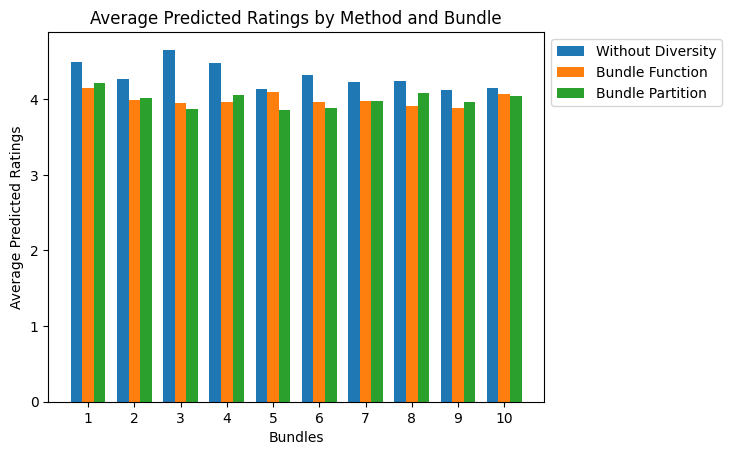

In [77]:
# Sample data
bundles_list = [f'{i+1}' for i in range(10)]

x = np.arange(len(bundles_list))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, bundle_data[0]['average_predicted_rating'], width, label='Without Diversity')
rects2 = ax.bar(x, bundle_data[1]['average_predicted_rating'], width, label='Bundle Function')
rects3 = ax.bar(x + width, bundle_data[2]['average_predicted_rating'], width, label='Bundle Partition')

ax.set_xlabel('Bundles')
ax.set_ylabel('Average Predicted Ratings')
ax.set_title('Average Predicted Ratings by Method and Bundle')
ax.set_xticks(x)
ax.set_xticklabels(bundles_list)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

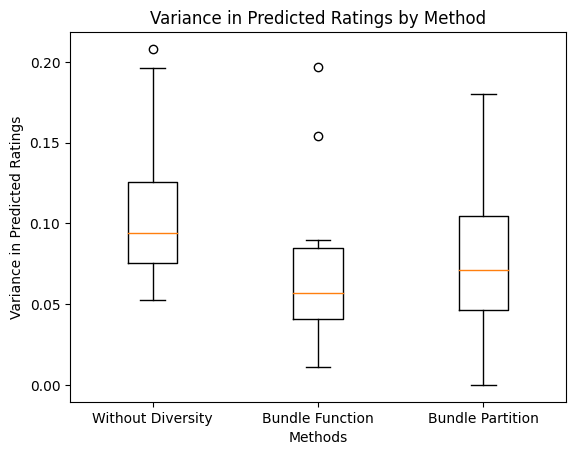

In [78]:
data = [bundle_data[0]['variance_predicted_rating'], bundle_data[1]['variance_predicted_rating'], bundle_data[2]['variance_predicted_rating']]

fig, ax = plt.subplots()
ax.boxplot(data, labels=['Without Diversity', 'Bundle Function', 'Bundle Partition'])

ax.set_xlabel('Methods')
ax.set_ylabel('Variance in Predicted Ratings')
ax.set_title('Variance in Predicted Ratings by Method')

plt.show()

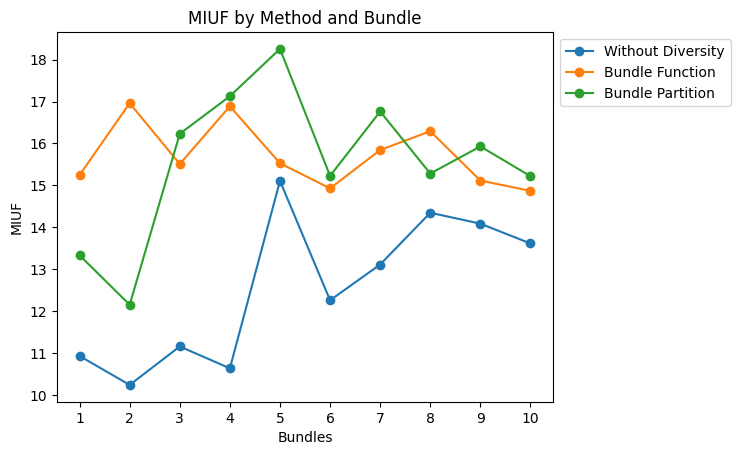

In [79]:
fig, ax = plt.subplots()
ax.plot(bundles_list, bundle_data[0]['miuf'], marker='o', label='Without Diversity')
ax.plot(bundles_list, bundle_data[1]['miuf'], marker='o', label='Bundle Function')
ax.plot(bundles_list, bundle_data[2]['miuf'], marker='o', label='Bundle Partition')

ax.set_xlabel('Bundles')
ax.set_ylabel('MIUF')
ax.set_title('MIUF by Method and Bundle')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [80]:
print('ILD for the bundle without diversity:')
for i, ild in enumerate(ilds_0):
    print(f'- Bundle {i + 1}: {ild}')
print(f'Mean: {np.mean(ilds_0)}')

ILD for the bundle without diversity:
- Bundle 1: 0.17487819941764163
- Bundle 2: 0.21848719234874486
- Bundle 3: 0.2985700307844671
- Bundle 4: 0.3120348970098955
- Bundle 5: 0.46579187532787864
- Bundle 6: 0.528685227062798
- Bundle 7: 0.5130283366463076
- Bundle 8: 0.32967786267243293
- Bundle 9: 0.5464017407588593
- Bundle 10: 0.5303037116683459
Mean: 0.3917859073697371


In [81]:
print('ILD for bundle function:')
for i, ild in enumerate(ilds_1):
    print(f'- Bundle {i + 1}: {ild}')
print(f'Mean: {np.mean(ilds_1)}')

ILD for bundle function:
- Bundle 1: 0.9695384634503403
- Bundle 2: 0.9389708173525388
- Bundle 3: 0.9650212127450393
- Bundle 4: 0.9260802113688505
- Bundle 5: 0.9778870715550649
- Bundle 6: 0.9811540737715398
- Bundle 7: 0.9584835602148356
- Bundle 8: 0.9790411740677223
- Bundle 9: 0.96821001927168
- Bundle 10: 0.9458339986812376
Mean: 0.961022060247885


In [82]:
print('ILD for bundle partition:')
for i, ild in enumerate(ilds_2):
    print(f'- Bundle {i + 1}: {ild}')
print(f'Mean: {np.mean(ilds_2)}')

ILD for bundle partition:
- Bundle 1: 0.8354445571773752
- Bundle 2: 0.8344787834407589
- Bundle 3: 0.5482808397601266
- Bundle 4: 0.7862167697189044
- Bundle 5: 0.7247491743735126
- Bundle 6: 0.9027905762017575
- Bundle 7: 0.8856000677550456
- Bundle 8: 0.6893828345350537
- Bundle 9: 0.7700473613335774
- Bundle 10: 0.8863651482650889
Mean: 0.78633561125612


<Figure size 800x600 with 0 Axes>

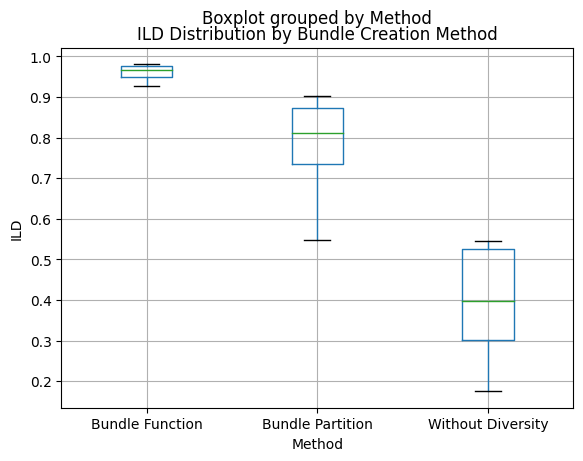

In [83]:
# Create a DataFrame to hold ILD values
ild_data = {
    'Method': ['Without Diversity'] * len(ilds_0) + ['Bundle Function'] * len(ilds_1) + ['Bundle Partition'] * len(ilds_2),
    'ILD': ilds_0 + ilds_1 + ilds_2
}
ild_df = pd.DataFrame(ild_data)

# Create a box plot
plt.figure(figsize=(8, 6))
ild_df.boxplot(column='ILD', by='Method')
plt.title('ILD Distribution by Bundle Creation Method')
plt.ylabel('ILD')
plt.show()
